### MOwNiT - Labolatorium 4 - Dominik Jędraszek

#### 1. Porównanie różnych metod mnożenia macierzy kwadratowej

In [3]:
function naive_multiplication(A,B)
    n= length(A[:,1])
    C = zeros(Float64, n,n)
    for i=1:n
        for j=1:n
            for k=1:n
                C[i,j] += A[i,k]*B[k,j]
            end
        end
    end
    return C
end
function better_multiplication(A, B)
     n= length(A[:,1])
    C = zeros(Float64, n,n)
    for j=1:n
        for k=1:n
            for i=1:n
                C[i,j] += A[i,k]*B[k,j]
            end
        end
    end
    return C
end
function blas_multiplication(A,B)
    return A*B
end

blas_multiplication (generic function with 1 method)

Poniżej testy dla coraz większych macierzy kwadratowych wraz z mierzeniem czasu:

In [6]:
#using Pkg
#Pkg.add("DataFrames")
using DataFrames

method=["" for _ in 1:(10*5*2)]
size=[0 for _ in 1:(10*5*2)]
time=zeros(10*5*2)
cnt = 1
for i = 1:10
    for n in [5,10,15,20,25]
        m1=rand(n,n)
        m2=rand(n,n)
        
         if(cnt==1) #pierwszy test bez zapisu
            better_multiplication(m1,m2)
            blas_multiplication(m1,m2)
        end
        
        method[cnt]="better"
        size[cnt]=n
        time[cnt] = @elapsed better_multiplication(m1,m2)
        cnt+=1
        
        method[cnt]="blas"
        size[cnt]=n
        time[cnt] = @elapsed blas_multiplication(m1,m2)
        cnt+=1
    end
end

data = DataFrame(method=method,size= size,time=time)

,method,size,time
,String,Int64,Float64
1,better,5,7.26e-7
2,blas,5,7.27e-7
3,better,10,2.545e-6
4,blas,10,2.334e-6
5,better,15,7.429e-6
6,blas,15,2.672e-6
7,better,20,1.7523e-5
8,blas,20,3.064e-6
9,better,25,3.0472e-5


Grupowanie danych:

In [3]:
using Statistics
grouped = sort(combine(groupby(data, [:method,:size]), nrow=> :no_tests,"time" => mean,"time"=>std),[:method,:size])

,method,size,no_tests,time_mean,time_std
,String,Int64,Int64,Float64,Float64
1,better,5,10,8.54e-7,7.12213e-7
2,better,10,10,3.5382e-6,4.13596e-6
3,better,15,10,7.1233e-6,1.69042e-7
4,better,20,10,1.83493e-5,2.33796e-6
5,better,25,10,3.06924e-5,4.81071e-7
6,blas,5,10,9.113e-7,1.61264e-6
7,blas,10,10,8.155e-7,3.76982e-7
8,blas,15,10,1.4426e-6,3.46488e-7
9,blas,20,10,2.0353e-6,3.19751e-7


Rysowanie wykresu zależyności czasu od rozmiaru macierzy wraz z słupkami błędów:

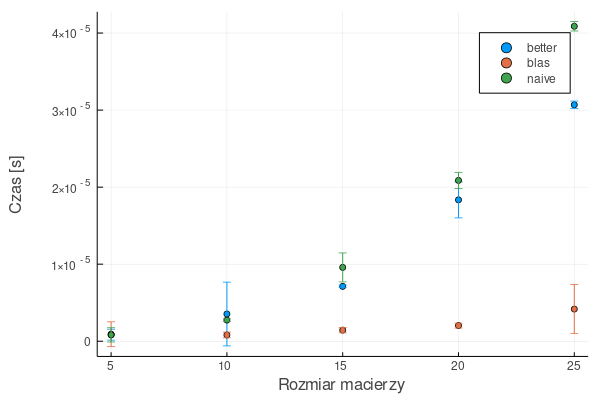

In [4]:
#import Pkg; Pkg.add("Plots")
using Plots
default(fmt = :png)
p=scatter(grouped.size, grouped.time_mean, group=grouped.method,yerror=grouped.time_std, layout=1,label=["better" "blas" "naive"])
xlabel!("Rozmiar macierzy")
ylabel!("Czas [s]")

#### 1. Użyć funkcji polyfit z pakietu Polynomials do znalezienia odpowiednich wielomianów, które najlepiej pasują do zależności czasowych każdego z algorytmów. Najlepiej sprawdzi się tu wielomian drugiego stopnia:

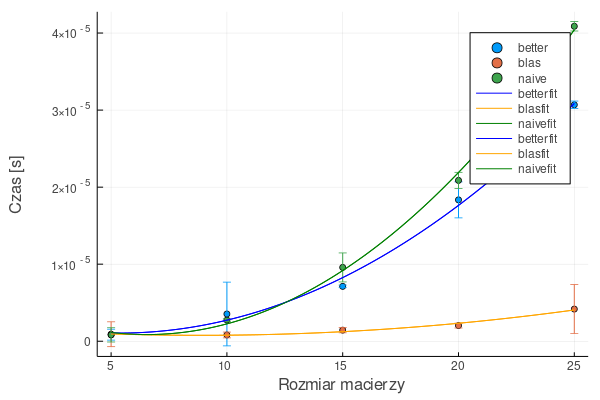

In [10]:
using Polynomials
blas = grouped[grouped.method .== "blas", :]
naive = grouped[grouped.method .== "naive", :]
better = grouped[grouped.method .== "better", :]

plot!(polyfit(better.size, better.time_mean,2),label="betterfit",color="blue",extrema(better.size)...)
plot!(polyfit(blas.size, blas.time_mean,2),label="blasfit",color="orange",extrema(blas.size)...)
plot!(polyfit(naive.size, naive.time_mean,2),label="naivefit",color="green",extrema(naive.size)...)

In [7]:
using CSV

 CSV.write("res.csv", data,header =  filesize("res.csv")==0)

"res.csv"